In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
stocks = ['HDFC.NS', 'IOLCP.NS', 'AUBANK.NS', 'MGL.NS', 'CAPPL.BO', 'NESCO.NS', 'ATUL.NS', 'TIINDIA.NS', 'VSTIND.NS', 'MASFIN.BO']

In [ ]:
df = web.DataReader(stocks,data_source = 'yahoo', start = '01/01/2017', end ='31/12/2019')['Adj Close']
df.sort_index(inplace =True)

In [ ]:
returns = df.pct_change()

In [ ]:
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [ ]:
num_portfolios = 50000
results = np.zeros((4+len(stocks)-1,num_portfolios))

In [ ]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(10))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [ ]:
results_frame = pd.DataFrame(results.T,
                             columns=['ret','stdev','sharpe'
                                      ,stocks[0],stocks[1],stocks[2]
                                      ,stocks[3],stocks[4],stocks[5]
                                      ,stocks[6],stocks[7],stocks[8]
                                      ,stocks[9]])

In [ ]:
results_frame.head()

,ret,stdev,sharpe,HDFC.NS,IOLCP.NS,AUBANK.NS,MGL.NS,CAPPL.BO,NESCO.NS,ATUL.NS,TIINDIA.NS,VSTIND.NS,MASFIN.BO
0,0.249719,0.148236,1.684605,0.133196,0.095076,0.132504,0.120169,0.036149,0.077388,0.138239,0.076796,0.145160,0.045323
1,0.199684,0.183159,1.090222,0.094410,0.021440,0.039813,0.026868,0.207799,0.195831,0.002580,0.042027,0.110993,0.258239
2,0.233630,0.193535,1.207168,0.050048,0.191413,0.128734,0.081780,0.072439,0.180289,0.081970,0.016593,0.012770,0.183964
3,0.229856,0.189052,1.215837,0.198217,0.189840,0.150417,0.101789,0.131522,0.122829,0.000808,0.013602,0.042837,0.048140
4,0.224014,0.200924,1.114917,0.139325,0.189000,0.203032,0.040518,0.173965,0.183131,0.028850,0.018397,0.005866,0.017916


In [ ]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

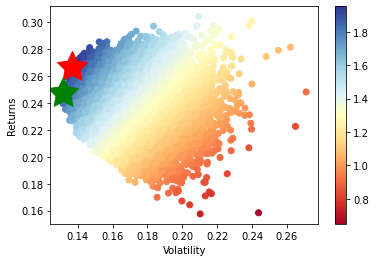

In [ ]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [ ]:
print("Portfolio with Maximum Sharpe Ratio")
print(max_sharpe_port)

Portfolio with Maximum Sharpe Ratio
ret           0.266811
stdev         0.136652
sharpe        1.952484
HDFC.NS       0.162460
IOLCP.NS      0.005345
AUBANK.NS     0.025444
MGL.NS        0.069448
CAPPL.BO      0.011992
NESCO.NS      0.140828
ATUL.NS       0.177885
TIINDIA.NS    0.188850
VSTIND.NS     0.175081
MASFIN.BO     0.042667
Name: 34352, dtype: float64


In [ ]:
print("Portfolio with Minimum Volatility")
print(min_vol_port)

Portfolio with Minimum Volatility
ret           0.247219
stdev         0.131337
sharpe        1.882324
HDFC.NS       0.197032
IOLCP.NS      0.010799
AUBANK.NS     0.064385
MGL.NS        0.141440
CAPPL.BO      0.028452
NESCO.NS      0.103351
ATUL.NS       0.201928
TIINDIA.NS    0.080441
VSTIND.NS     0.150875
MASFIN.BO     0.021298
Name: 41779, dtype: float64
